In [1]:
import numpy as np 
import matplotlib.pyplot as plt #Matplotlib is a Python plotting library 
%matplotlib inline 
#This is the magic number fix for plots
import seaborn as sns
# Seaborn is a library plotting in Python
import pandas as pd # import pandas this is to import the dataset in to a dataframe structure



In [2]:
#Read in the dataset as a pandas Dataframe wind_df
wind_df = pd.read_csv('./powerproduction.csv')

In [3]:
wind_df.shape #The Dataset is 500 rows and two columns

(500, 2)

In [4]:
#Prints the first 5 rows of the dataset
wind_df.head()

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


In [5]:
#Print the keys of the dataset
print(wind_df.keys())

Index(['speed', 'power'], dtype='object')


In [6]:
#Print Dataset shape
print(wind_df.power.shape)

(500,)


In [7]:
wind_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
speed    500 non-null float64
power    500 non-null float64
dtypes: float64(2)
memory usage: 7.9 KB


In [8]:
#Prints the statistical details of the dataset
wind_df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


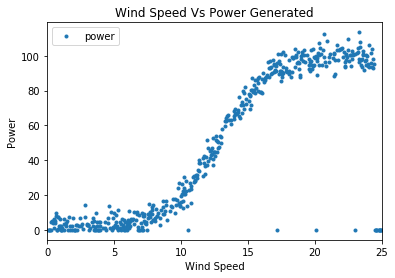

In [9]:
# Plot graph to get a visual view of the dataset
wind_df.plot(x='speed', y='power', style='.')
plt.title('Wind Speed Vs Power Generated')
plt.xlabel('Wind Speed')
plt.ylabel('Power')
plt.show()

Text(0, 0.5, 'Power')

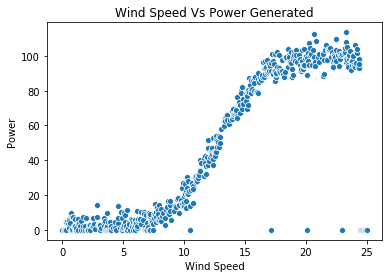

In [10]:
#The Seaborn scatter plot is added for comparsion 
sns.scatterplot(x='speed',y='power',data = wind_df)
plt.title('Wind Speed Vs Power Generated')
plt.xlabel('Wind Speed')
plt.ylabel('Power')

From both plots above it can be seen that there is a positive linear relationship between the wind speed and the power generated at certain wind speeds. There is an initial wind speed up to 7 where there is not much change in power then it is capped when the wind is over 20.

### Observations

The data looks like a sigma curve this would look like a perfect fit for Logistic regression but Logistic regression applies to categorical data.

https://builtin.com/data-science/tour-top-10-algorithms-machine-learning-newbies

https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8 

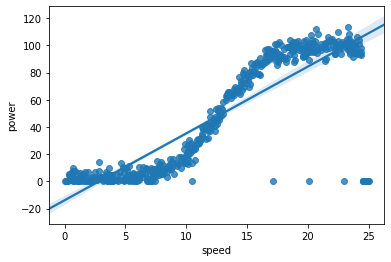

In [11]:
sns.regplot(x='speed',y='power',data = wind_df)

### Linear Regression on Raw Data
***

In this section we will run the linear regression algorithm on all the data.

The data needs to be divided in to attributes and labels. Attributes are independent labels and variables are dependent variables. So the variable power is dependent on the wind speed.

#### References

https://www.jeremyjordan.me/evaluating-a-machine-learning-model/


In [12]:
# The two columns values are separated from the dataset and are assigned to variables

x = wind_df.iloc[:, :-1].values
y = wind_df.iloc[:, 1].values

In [13]:
#print(x)

In [14]:
#print(y)

In [15]:
#The dataset is split for training and testing. The test size is 30% of the dataset and the training is 70%
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [16]:
#The linear regression class is imported and the fit method is called on the train variables x & y
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
# Thie line of code displays the intercept
print(regressor.intercept_)

-14.268294913084134


In [18]:
# This line of code displays the slop coefficient of x
print(regressor.coef_)

[4.92519587]


In [19]:
y_pred = regressor.predict(x_test)

In [20]:
dfcompare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pd.set_option('display.max_rows', 500)
#pd.option_context('max_rows', None, 'display.max_columns', None)
dfcompare

,Actual,Predicted
0,7.060,9.889791
1,51.149,48.345720
2,71.763,57.092868
3,99.357,96.164447
4,113.556,100.355789
5,0.000,-10.692603
6,86.611,64.859902
7,95.117,105.901559
8,9.385,24.433894
9,14.788,23.325725


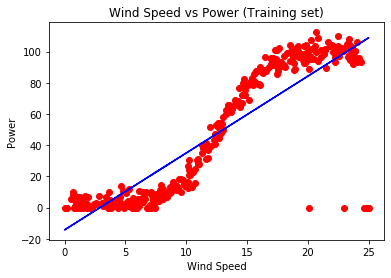

In [21]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Wind Speed vs Power (Training set)')
plt.xlabel('Wind Speed')
plt.ylabel('Power')
plt.show()

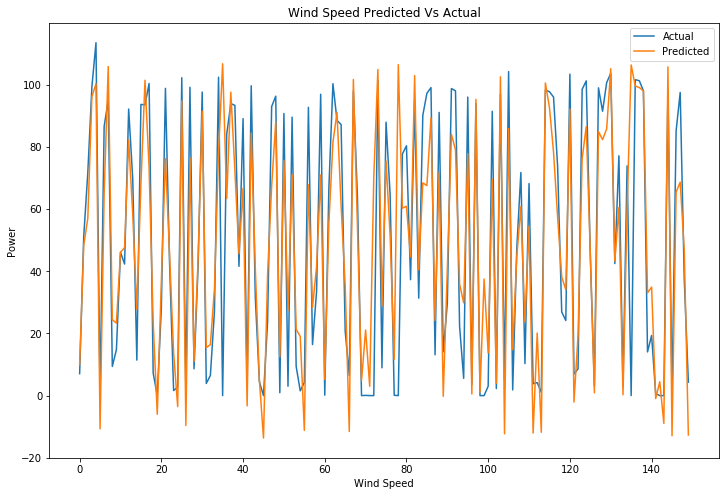

In [22]:
plt.figure(figsize=(12,8))
plt.plot(dfcompare.Actual, label='Actual')
plt.plot(dfcompare.Predicted, label='Predicted')
plt.title('Wind Speed Predicted Vs Actual')
plt.ylabel('Power')
plt.xlabel('Wind Speed')
plt.legend()
plt.show()

In [23]:
### Linear Regression on Cleansed Data
### Add readings to a new dataframe where power is not equal to 0

cleaned_wind_df = wind_df.loc[wind_df['power'] != 0 ]
cleaned_wind_df


,speed,power
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553
10,0.551,6.498
11,0.576,5.241
12,0.626,4.220
13,0.676,7.974
14,0.701,9.746


In [24]:
cleaned_wind_df.shape #The Dataset is 451 rows and two columns with the pwer = 0 values removed

(451, 2)

In [25]:
cleaned_wind_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 451 entries, 5 to 489
Data columns (total 2 columns):
speed    451 non-null float64
power    451 non-null float64
dtypes: float64(2)
memory usage: 10.6 KB


In [26]:
cleaned_wind_df.describe()

,speed,power
count,451.000000,451.000000
mean,13.004302,53.231246
std,6.835979,40.522055
min,0.325000,0.067000
25%,7.344500,8.543500
50%,13.038000,58.168000
75%,18.781500,94.725500
max,24.399000,113.556000


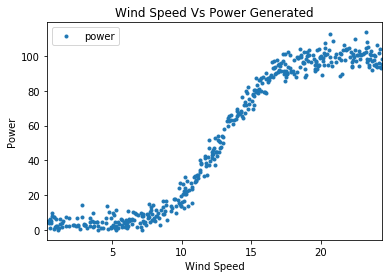

In [27]:
# Plot graph to get a visual view of the dataset without power = 0 values
cleaned_wind_df.plot(x='speed', y='power', style='.')
plt.title('Wind Speed Vs Power Generated')
plt.xlabel('Wind Speed')
plt.ylabel('Power')
plt.show()

### Linear Regression on Cleaned Data
***

In this section we will run the linear regression algorithm on all the cleaned data.

The data needs to be divided in to attributes and labels. Attributes are independed labels and variables are dependent variables. So the variable power is dependent on the wind speed. 

The variables are given **'_c'** to indicate that they are from the cleaned data set **cleaned_wind_df**

In [28]:
# The two columns values are separated from the dataset and are assigned to variables

x_c = cleaned_wind_df.iloc[:, :-1].values
y_c = cleaned_wind_df.iloc[:, 1].values

In [29]:
#The dataset is split for training and testing. The test size is 30% of the dataset and the training is 70%
from sklearn.model_selection import train_test_split
x_train_c, x_test_c, y_train_c, y_test_c = train_test_split(x_c, y_c, test_size=0.25, random_state=0)

In [30]:
#The linear regression class is imported and the fit method is called on the train variables x_c & y_c
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train_c, y_train_c)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
# Thie line of code displays the intercept
print(regressor.intercept_)

-21.161062215353745


In [32]:
# This line of code displays the slop coefficient of x
print(regressor.coef_)

[5.74303906]


In [33]:
y_pred_c = regressor.predict(x_test_c)

In [34]:
cleaned_dfcompare = pd.DataFrame({'Actual': y_test_c, 'Predicted': y_pred_c})
pd.set_option('display.max_rows', 500)
#pd.option_context('max_rows', None, 'display.max_columns', None)
cleaned_dfcompare

,Actual,Predicted
0,9.385,23.967739
1,0.132,1.546914
2,80.418,67.655037
3,93.698,74.845322
4,65.605,56.013897
5,6.656,27.126410
6,7.350,-16.273736
7,94.071,92.665972
8,86.288,68.809388
9,0.929,10.023640


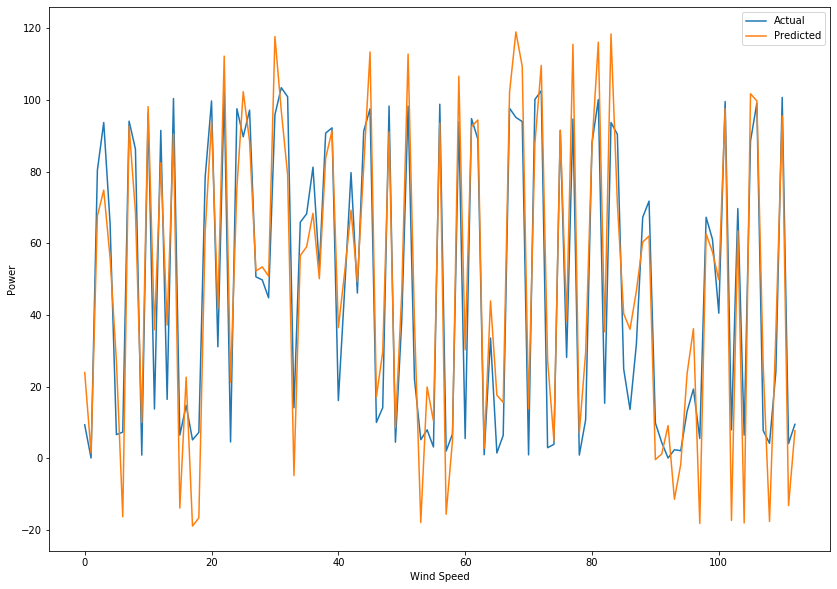

In [35]:
plt.figure(figsize=(14,10))
plt.plot(cleaned_dfcompare.Actual, label='Actual')
plt.plot(cleaned_dfcompare.Predicted, label='Predicted')
plt.ylabel('Power')
plt.xlabel('Wind Speed')
plt.legend()
plt.show()

### Evaluating the Accuracy of the Model

To evaluate the accuracy of the model on both the original dataset and the cleaned dataset we will use the following three evaluation metrics.

* MAE - Mean Absolute Error
* MSE - Mean Squared Error
* RMSE - Root Mean Squared Error

#### References

https://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/

https://www.sciencedirect.com/topics/engineering/mean-absolute-error

https://towardsdatascience.com/ways-to-evaluate-regression-models-77a3ff45ba70

https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-the-coefficient-of-variation/

https://www.geeksforgeeks.org/scipy-stats-variation-function-python/



In [36]:
from sklearn import metrics

# Testing  

#calculate MAE, MSE, RMSE
# MAE - Mean Absolute Error
# MSE - Mean Squared Error
# RMSE-  Root Mean Squared Error

print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_test))
print("Mean Squared Error: ",metrics.mean_squared_error(y_test, y_test))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(y_test, y_test)))



Mean Absolute Error:  0.0
Mean Squared Error:  0.0
Root Mean Squared Error:  0.0


In [37]:
from sklearn import metrics

#calculate MAE, MSE, RMSE
# MAE - Mean Absolute Error
# MSE - Mean Squared Error
# Square Root Mean Squared Error

print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ",metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  14.46211643465891
Mean Squared Error:  459.6312892379741
Root Mean Squared Error:  21.439013252432446


In [38]:
#calculate MAE, MSE, RMSE
# MAE - Mean Absolute Error
# MSE - Mean Squared Error
# Square Root Mean Squared Error

print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ",metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  14.46211643465891
Mean Squared Error:  459.6312892379741
Root Mean Squared Error:  21.439013252432446


In [39]:
#calculate MAE, MSE, RMSE

# MAE - Mean Absolute Error
# MSE - Mean Squared Error
# Square Root Mean Squared Error

print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test_c, y_pred_c))
print("Mean Squared Error: ",metrics.mean_squared_error(y_test_c, y_pred_c))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(y_test_c, y_pred_c)))

Mean Absolute Error:  11.868436744376112
Mean Squared Error:  194.15380632841203
Root Mean Squared Error:  13.93390850868528


### Using Neural Network


In [40]:
import sklearn.neural_network as sknn






### Apply Neural Network to Raw dataset

In [41]:
print(x)
x.shape

[[ 0.   ]
 [ 0.125]
 [ 0.15 ]
 [ 0.225]
 [ 0.275]
 [ 0.325]
 [ 0.4  ]
 [ 0.45 ]
 [ 0.501]
 [ 0.526]
 [ 0.551]
 [ 0.576]
 [ 0.626]
 [ 0.676]
 [ 0.701]
 [ 0.726]
 [ 0.751]
 [ 0.801]
 [ 0.826]
 [ 0.851]
 [ 0.926]
 [ 0.951]
 [ 0.976]
 [ 1.001]
 [ 1.026]
 [ 1.051]
 [ 1.076]
 [ 1.101]
 [ 1.151]
 [ 1.251]
 [ 1.276]
 [ 1.301]
 [ 1.401]
 [ 1.426]
 [ 1.502]
 [ 1.552]
 [ 1.652]
 [ 1.677]
 [ 1.702]
 [ 1.827]
 [ 1.877]
 [ 1.902]
 [ 2.027]
 [ 2.077]
 [ 2.102]
 [ 2.177]
 [ 2.227]
 [ 2.252]
 [ 2.402]
 [ 2.477]
 [ 2.553]
 [ 2.578]
 [ 2.703]
 [ 2.828]
 [ 2.853]
 [ 2.953]
 [ 3.003]
 [ 3.028]
 [ 3.053]
 [ 3.078]
 [ 3.128]
 [ 3.203]
 [ 3.378]
 [ 3.403]
 [ 3.428]
 [ 3.504]
 [ 3.529]
 [ 3.579]
 [ 3.604]
 [ 3.629]
 [ 3.679]
 [ 3.704]
 [ 3.729]
 [ 3.779]
 [ 3.804]
 [ 3.879]
 [ 3.904]
 [ 3.929]
 [ 3.954]
 [ 3.979]
 [ 4.179]
 [ 4.304]
 [ 4.329]
 [ 4.429]
 [ 4.53 ]
 [ 4.555]
 [ 4.605]
 [ 4.73 ]
 [ 4.78 ]
 [ 4.88 ]
 [ 4.905]
 [ 4.93 ]
 [ 4.955]
 [ 4.98 ]
 [ 5.03 ]
 [ 5.08 ]
 [ 5.13 ]
 [ 5.18 ]
 [ 5.205]
 [ 5.255]


(500, 1)

In [42]:
# Train the neural network.
regr = sknn.MLPRegressor(max_iter=100000).fit(x_train, y_train)

# Show the predictions.
result = np.array([y_test, regr.predict(x_test)]).T

In [43]:
print(result)


[[7.06000000e+00 3.58721485e+00]
 [5.11490000e+01 5.01550730e+01]
 [7.17630000e+01 7.01497258e+01]
 [9.93570000e+01 8.79926430e+01]
 [1.13556000e+02 8.64193266e+01]
 [0.00000000e+00 3.32582137e+00]
 [8.66110000e+01 8.59073342e+01]
 [9.51170000e+01 8.43375942e+01]
 [9.38500000e+00 7.41679515e+00]
 [1.47880000e+01 6.46091968e+00]
 [4.61360000e+01 4.50776020e+01]
 [4.23360000e+01 4.84663354e+01]
 [9.22030000e+01 9.32191593e+01]
 [6.96990000e+01 7.29755467e+01]
 [1.14220000e+01 1.02886699e+01]
 [9.36980000e+01 9.01299123e+01]
 [9.35270000e+01 8.60033499e+01]
 [1.00429000e+02 9.49356300e+01]
 [7.24500000e+00 6.67333645e+00]
 [0.00000000e+00 3.38530574e+00]
 [2.81810000e+01 2.36644096e+01]
 [9.88550000e+01 9.52736515e+01]
 [4.31980000e+01 4.45146895e+01]
 [1.62600000e+00 3.63731683e+00]
 [2.70100000e+00 3.41658039e+00]
 [1.02281000e+02 8.85010590e+01]
 [1.60900000e+00 3.33989496e+00]
 [9.92140000e+01 9.52483619e+01]
 [8.62300000e+00 3.60128844e+00]
 [4.16920000e+01 4.05743018e+01]
 [9.767100

In [44]:
#regr.score(regr.predict(x_test),y_test)

In [45]:
#calculate MAE, MSE, RMSE

# MAE - Mean Absolute Error
# MSE - Mean Squared Error
# Square Root Mean Squared Error

print("Mean Absolute Error: ", metrics.mean_absolute_error(y, regr.predict(x)))
print("Mean Squared Error: ",metrics.mean_squared_error(y, regr.predict(x)))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(y, regr.predict(x))))
print("Coefficient of variation: ", (100 * np.sqrt(metrics.mean_squared_error(y, regr.predict(x))))/np.mean(y))

Mean Absolute Error:  6.815975755812307
Mean Squared Error:  230.6619633558934
Root Mean Squared Error:  15.187559493081611
Coefficient of variation:  31.631138349718107


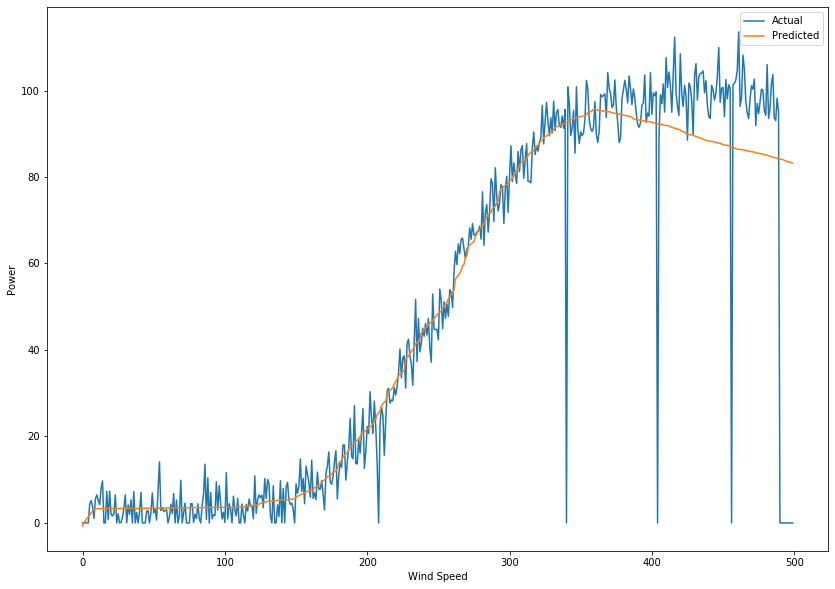

In [46]:
plt.figure(figsize=(14,10))
plt.plot(y, label='Actual')
plt.plot(regr.predict(x), label='Predicted')
plt.ylabel('Power')
plt.xlabel('Wind Speed')
plt.legend()
plt.show()

In [47]:
#regr.score(regr.predict(x),y)

### Apply Neural Network to Cleaned dataset

In [48]:
# Train the neural network.
regr = sknn.MLPRegressor(max_iter=10000).fit(x_c, y_c)

# Show the predictions.
result = np.array([y_c, regr.predict(x_c)]).T

In [49]:
result

array([[4.33100000e+00, 4.06156553e+00],
       [5.18600000e+00, 4.16499732e+00],
       [3.82600000e+00, 4.23395185e+00],
       [1.04800000e+00, 4.30428547e+00],
       [5.55300000e+00, 4.33876273e+00],
       [6.49800000e+00, 4.37323999e+00],
       [5.24100000e+00, 4.37297298e+00],
       [4.22000000e+00, 4.36811901e+00],
       [7.97400000e+00, 4.36326504e+00],
       [9.74600000e+00, 4.36083806e+00],
       [7.27100000e+00, 4.35113012e+00],
       [7.95000000e-01, 4.34870313e+00],
       [7.35000000e+00, 4.34627615e+00],
       [1.99600000e+00, 4.33899520e+00],
       [1.60900000e+00, 4.33656821e+00],
       [2.06400000e+00, 4.33414123e+00],
       [6.51100000e+00, 4.33171424e+00],
       [2.08500000e+00, 4.32686027e+00],
       [1.21000000e-01, 4.32200631e+00],
       [1.20800000e+00, 4.31715234e+00],
       [3.37300000e+00, 4.30744440e+00],
       [6.51000000e+00, 4.30501742e+00],
       [4.15600000e+00, 4.29288249e+00],
       [2.00500000e+00, 4.29045551e+00],
       [5.352000

In [50]:
#calculate MAE, MSE, RMSE

# MAE - Mean Absolute Error
# MSE - Mean Squared Error
# Square Root Mean Squared Error

print("Mean Absolute Error: ", metrics.mean_absolute_error(y_c, regr.predict(x_c)))
print("Mean Squared Error: ",metrics.mean_squared_error(y_c, regr.predict(x_c)))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(y_c, regr.predict(x_c))))
print("Coefficient of variation: ", (100 * np.sqrt(metrics.mean_squared_error(y_c, regr.predict(x_c))))/np.mean(y_c))

Mean Absolute Error:  3.334951835357918
Mean Squared Error:  17.81037538916495
Root Mean Squared Error:  4.22023404435879
Coefficient of variation:  7.928114316291127


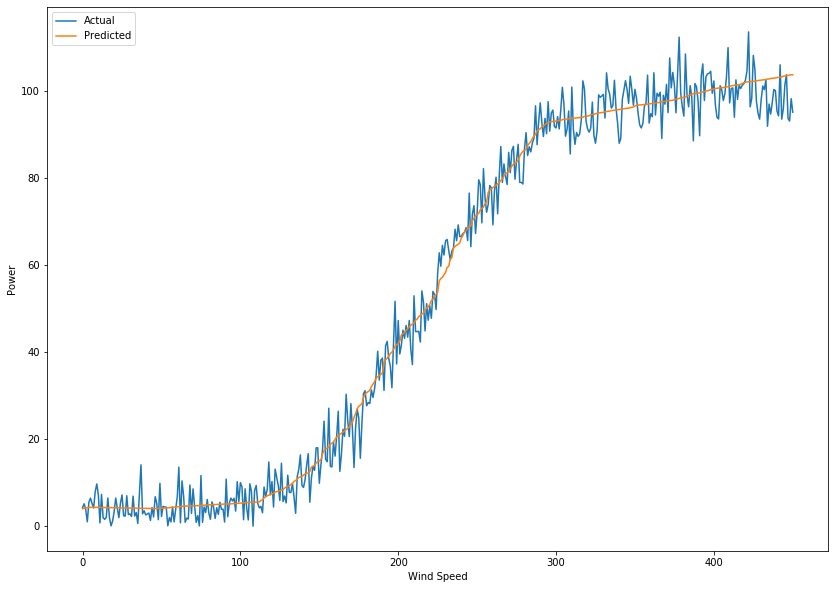

In [51]:
plt.figure(figsize=(14,10))
plt.plot(y_c, label='Actual')
plt.plot(regr.predict(x_c), label='Predicted')
plt.ylabel('Power')
plt.xlabel('Wind Speed')
plt.legend()
plt.show()

### References 

(https://datacarpentry.org/python-ecology-lesson/02-starting-with-data/) "Working With Pandas DataFrames in Python"

(https://stackabuse.com/linear-regression-in-python-with-scikit-learn/) "Linear Regression in Python with Scikit-Learn"



In [52]:
# >>> from sklearn.neural_network import MLPRegressor
# >>> from sklearn.datasets import make_regression
# >>> from sklearn.model_selection import train_test_split
# >>> X, y = make_regression(n_samples=200, random_state=1)
# >>> X_train, X_test, y_train, y_test = train_test_split(X, y,
# ...                                                     random_state=1)
# >>> regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
# >>> regr.predict(X_test[:2])
# array([-0.9..., -7.1...])
# >>> regr.score(X_test, y_test)
# 0.4...

In [53]:
regr = sknn.MLPRegressor(max_iter=10000).fit(x_train, y_train)
regr.predict(x_test[:2])
regr.score(x_test, y_test)

0.8619289904220735

In [54]:
# Show the predictions.
test_result = np.array([y_test, regr.predict(x_test)]).T

In [55]:
print(test_result)

[[7.06000000e+00 4.13543550e+00]
 [5.11490000e+01 5.04128337e+01]
 [7.17630000e+01 7.07488910e+01]
 [9.93570000e+01 8.65767522e+01]
 [1.13556000e+02 8.42688870e+01]
 [0.00000000e+00 2.71700559e+00]
 [8.66110000e+01 8.63066020e+01]
 [9.51170000e+01 8.12152370e+01]
 [9.38500000e+00 7.46188540e+00]
 [1.47880000e+01 6.35075893e+00]
 [4.61360000e+01 4.52486660e+01]
 [4.23360000e+01 4.86952613e+01]
 [9.22030000e+01 9.42434208e+01]
 [6.96990000e+01 7.36229622e+01]
 [1.14220000e+01 1.08002032e+01]
 [9.36980000e+01 9.05657024e+01]
 [9.35270000e+01 8.36586994e+01]
 [1.00429000e+02 9.43193208e+01]
 [7.24500000e+00 6.59767592e+00]
 [0.00000000e+00 3.07160903e+00]
 [2.81810000e+01 2.34698479e+01]
 [9.88550000e+01 9.50890206e+01]
 [4.31980000e+01 4.46761419e+01]
 [1.62600000e+00 4.37487605e+00]
 [2.70100000e+00 3.25084925e+00]
 [1.02281000e+02 8.73225371e+01]
 [1.60900000e+00 2.80295312e+00]
 [9.92140000e+01 9.51210914e+01]
 [8.62300000e+00 4.20269408e+00]
 [4.16920000e+01 4.06684729e+01]
 [9.767100

In [56]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, regr.predict(x_test)))
print("Mean Squared Error: ",metrics.mean_squared_error(y_test, regr.predict(x_test)))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(y_test, regr.predict(x_test))))
print("Coefficient of variation: ", (100 * np.sqrt(metrics.mean_squared_error(y_test, regr.predict(x_test))))/np.mean(y_test))

Mean Absolute Error:  7.079124161268748
Mean Squared Error:  238.97944188263273
Root Mean Squared Error:  15.458959922408516
Coefficient of variation:  31.009530266432144


In [57]:

####################### Towards Datascience example taken from 

# https://towardsdatascience.com/ml-preface-2-355b1775723e "Machine Learning Introduction 2: Our first Example"


In [58]:
wind_df

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


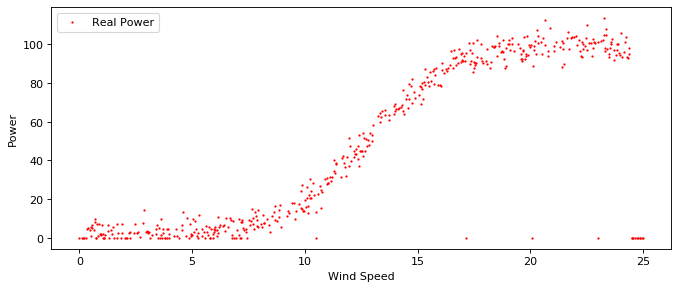

In [59]:
X = wind_df.iloc[:, :-1].values #Wind Speed
Y = wind_df.iloc[:, 1].values # Power
fig = plt.figure(dpi=80, figsize = (10, 4))
ax = fig.add_subplot(111)
ax.scatter(X, Y, c='r', label='Real Power', s = 1)
ax.set_xlabel('Wind Speed')
ax.set_ylabel('Power')

plt.legend()

In [60]:
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge
from mpl_toolkits.mplot3d import Axes3D

def model_power_regression(wind_df, model='Ridge'):
    num_samples = wind_df.shape[0]
    cutoff = (num_samples * 3) // 4
    Xtrn = wind_df.drop('power', 1).iloc[:cutoff,:]
    Ytrn = wind_df['power'].iloc[:cutoff]
    Xval = wind_df.drop('power', 1).iloc[cutoff:,:]
    Yval = wind_df['power'].iloc[cutoff:]
    model = Ridge().fit(Xtrn, Ytrn)
    coefs = model.coef_.round(2)
    yhat = model.predict(wind_df.drop('power', 1))
    yhatval = model.predict(Xval)
    loss = np.square(Yval - yhatval).mean()

    print('learned coefficients', list(zip(X, coefs)))
    print('loss:', loss)
    print('intercept', model.intercept_.round(2))
    
    return model, yhat, coefs, loss
def graph_real_and_predicted(wind_df, yhat, fname=None):
    X = wind_df.drop('power', 1)
    Y = wind_df['power']
    X = X['speed']
    fig = plt.figure(dpi=80, figsize=(10, 4))
    ax = fig.add_subplot(111)
    ax.scatter(X, Y, c='r', label='Real Power', s = 1)
    ax.scatter(X, yhat, c='b', label='Estimated Power', s = 1)
    ax.set_xlabel('Wind Speed')
    ax.set_ylabel('Power')
    plt.legend()


learned coefficients [(array([0.]), 5.94)]
loss: 1578.7649624191863
intercept -22.13


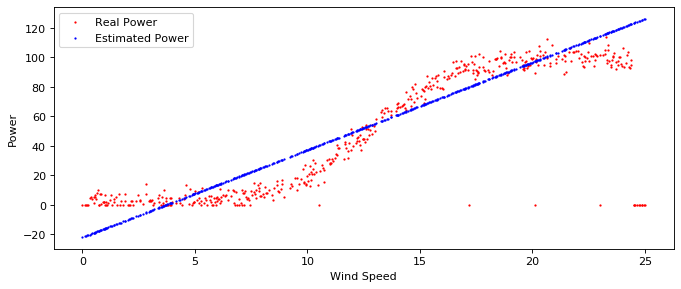

In [61]:
model, yhat, coefs, loss = model_power_regression(wind_df)
graph_real_and_predicted(wind_df, yhat, 'linear')

In [68]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, regr.predict(x_test)))
print("Mean Squared Error: ",metrics.mean_squared_error(y_test, regr.predict(x_test)))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(y_test, regr.predict(x_test))))


Mean Absolute Error:  7.079124161268748
Mean Squared Error:  238.97944188263273
Root Mean Squared Error:  15.458959922408516


In [63]:
#### Neural Network 

In [70]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge
from mpl_toolkits.mplot3d import Axes3D
import os

def model_power_MLP(wind_df, hidden, max_iter= 10000):
    num_samples = wind_df.shape[0]
    cutoff = (num_samples * 3) // 4
    Xtrn = wind_df.drop('power', 1).iloc[:cutoff,:]
    Ytrn = wind_df['power'].iloc[:cutoff]
    Xval = wind_df.drop('power', 1).iloc[cutoff:,:]
    Yval = wind_df['power'].iloc[cutoff:]
    model = MLPRegressor(hidden, validation_fraction = 0, solver='lbfgs', max_iter= max_iter).fit(Xtrn, Ytrn)
    coefs = model.coefs_
    yhat = model.predict(X)
    yhatval = model.predict(Xval)
    loss = np.square(Yval - yhatval).mean()
    hiddens = coefs[0].T
    final_mlp = coefs[1].flatten()
    
#     coefs = list(zip([dict(zip(X, h)) for h in hiddens],
#                      [['output mult:', m] for m in  final_mlp.flatten()], 
#                      [['intercept:', i] for i in  model.intercepts_[0]]))
#     print('loss:', loss)
#     if print_coefs:
#         print("IN if print_coefs:")
#         for idx, c in enumerate(coefs):
#             f1, o, i = c
#             print('feature', idx, '=', f1['brand'].round(2), '* brand +', 
#                   f1['d2c'].round(2), '* d2c', '+', i[1].round(2))
#         output = 'yhat = '
#         for fidx, v in enumerate(final_mlp):
#             output = output + str(v.round(2)) + ' * feat ' + str(fidx) + ' + '
#         output = output + str(model.intercepts_[1][0].round(2))
#         print(output)
    return model, yhat, coefs, loss

In [71]:
print("coefs, hiddens ",coefs)

coefs, hiddens  [array([[-4.36041611, -0.661788  , -0.05996029,  6.17775492,  0.44904623,
         1.29931941]]), array([[ 0.51785405],
       [-0.11399975],
       [ 0.3800657 ],
       [-0.01766206],
       [ 1.46496913],
       [ 7.05877202]])]


<IPython.core.display.Javascript object>


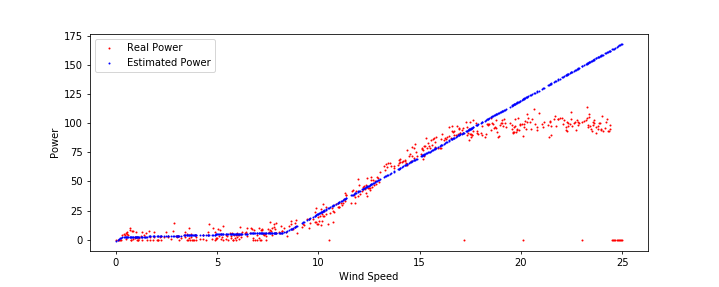

In [72]:
model, yhat, coefs, loss = model_power_MLP(wind_df,[6])
graph_real_and_predicted(wind_df, yhat, 'neural_network')